In [1]:
import pandas as pd

df = pd.read_csv('AirPassengers.csv')
print(df.shape)
print(df.head())

(144, 2)
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [9]:
raw_month = list(df['Month'])
passengers = list(df['#Passengers'])

train_x = []
for i in range(len(raw_month)):
    year = int( raw_month[i].split('-')[0] ) - 1949
    month = int( raw_month[i].split('-')[1] ) / 12 
    year_month = year + month
    # print(f"entry {i+1} --> {str(year_month)[:4]}    --> {passengers[i]}")
    train_x.append( [year_month] )

print(train_x[:20])

[[0.08333333333333333], [0.16666666666666666], [0.25], [0.3333333333333333], [0.4166666666666667], [0.5], [0.5833333333333334], [0.6666666666666666], [0.75], [0.8333333333333334], [0.9166666666666666], [1.0], [1.0833333333333333], [1.1666666666666667], [1.25], [1.3333333333333333], [1.4166666666666667], [1.5], [1.5833333333333335], [1.6666666666666665]]


In [10]:
import numpy as np

train_y = []
for psg in passengers:
    train_y.append( [psg] )

train_x = np.array(train_x)
train_y = np.array(train_y)

print(train_y[:10])

[[112]
 [118]
 [132]
 [129]
 [121]
 [135]
 [148]
 [148]
 [136]
 [119]]


In [11]:
for i in range(10):
    print(f"{train_x[i]} --> {train_y[i]}")

[0.08333333] --> [112]
[0.16666667] --> [118]
[0.25] --> [132]
[0.33333333] --> [129]
[0.41666667] --> [121]
[0.5] --> [135]
[0.58333333] --> [148]
[0.66666667] --> [148]
[0.75] --> [136]
[0.83333333] --> [119]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    loss='mae',
    optimizer='adam',
)

In [17]:
history = model.fit(
    train_x, train_y,
    epochs=150,
    verbose=0
)

model.evaluate(train_x, train_y)

5/5 [==============================] - 0s 2ms/step - loss: 33.4058


33.405792236328125

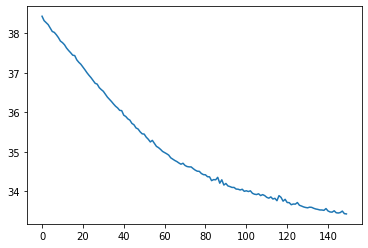

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()

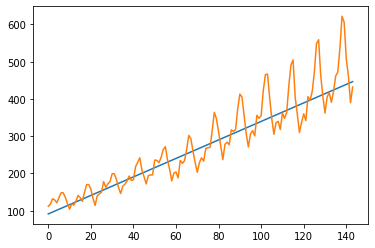

loss: 33.40579207738241


In [19]:
pred = model.predict(train_x)

plt.plot(pred)
plt.plot(train_y)
plt.show()

diff = []
for i in range(len(pred)):
    diff.append( abs(train_y[i][0] - pred[i][0]) )
    # print(f"diff: {str(train_y[i][0] - pred[i][0])[:4]}", end = ' ->  ')
    # print(f"{train_y[i]} --> {pred[i]}")

print( f"loss: {sum(diff)/len(diff)}" )